In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 

# Load Boston Housing Data

In [133]:
pd.read_csv('./Data/boston.csv')

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [134]:
boston = pd.read_csv('./Data/boston.csv')
print(boston.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


In [135]:
type(boston)

pandas.core.frame.DataFrame

In [136]:
Boston = boston.drop('Unnamed: 0',axis=1)
print(Boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


# Create features and target arrays

In [137]:
X = Boston.drop('medv', axis=1).values  # NumPy
y = Boston['medv'].values

# Predicting house value from a single feature

In [138]:
X_rooms = X[:,5]

In [139]:
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [140]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

# Plotting house value vs. number of rooms

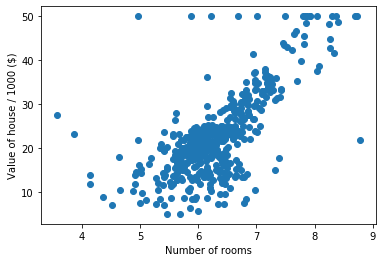

In [141]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house / 1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

# Fitting a regression model

In [142]:
from sklearn import linear_model

In [143]:
reg = linear_model.LinearRegression()

In [144]:
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [145]:
prediction_space = np.linspace(min(X_rooms),
                              max(X_rooms)).reshape(-1, 1)

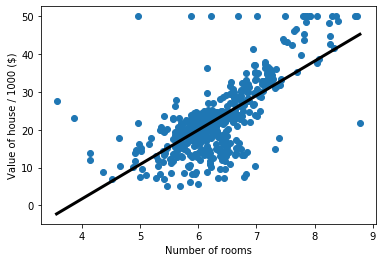

In [146]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house / 1000 ($)')
plt.xlabel('Number of rooms')
plt.plot(prediction_space, reg.predict(prediction_space),
        color='black', linewidth=3)
plt.show()

# Linear Regression Machine Learning: X_rooms and y

In [147]:
## split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rooms, y, 
                                                    test_size=0.3,
                                                    random_state=55)    

## train
reg_all = linear_model.LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

## R-squared
reg_all.score(X_test, y_test) # test data and test data target

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5294267019787982
Root Mean Squared Error: 5.836683568401009


# cf. Linear Regression on all features

## split data

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)    

## train

In [149]:
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## predict

In [150]:
y_pred = reg_all.predict(X_test)

## R-squared

In [151]:
reg_all.score(X_test, y_test) # test data and test data target

0.7112260057484923

## Compute and print R^2 and RMSE

In [152]:
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7112260057484923
Root Mean Squared Error: 4.638689926172828


# Cross-validation

In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)

np.mean(cv_results)


[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


0.3532759243958711

In [154]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(cvscores_3)
print(np.mean(cvscores_3))

[ 0.5839083   0.53248448 -5.86898835]
-1.584198522099727


In [155]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(cvscores_10)
print(np.mean(cvscores_10))

[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
0.20252899006054922


# Time it

In [156]:
%timeit cvscores_3 = cross_val_score(reg, X, y, cv=3)
%timeit cvscores_5 = cross_val_score(reg, X, y, cv=5)
%timeit cvscores_10 = cross_val_score(reg, X, y, cv=10)

3.14 ms ± 216 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.91 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.61 ms ± 410 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Regualized regression

## Ridge regression in scikit-learn

In [158]:
from sklearn.linear_model import Ridge
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127313

## Lasso regression in scikit-learn

In [162]:
from sklearn.linear_model import Lasso
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Ridge(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.6996938275127313

## Lasso for feature selection in scikit-learn

Since Lasso regression shrinks the coefficients of less important features to exactly 0, it can be used to select important features of a data.

<function matplotlib.pyplot.show(*args, **kw)>

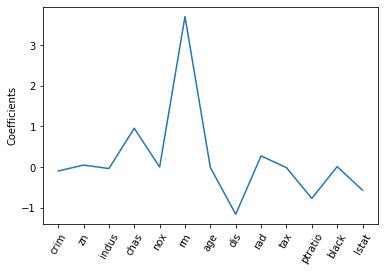

In [176]:
names = Boston.drop('medv', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

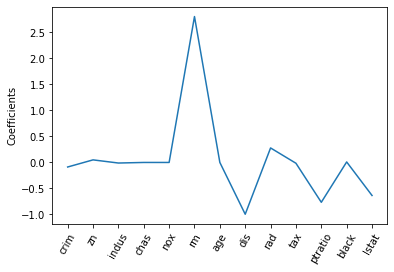

In [179]:
names = Boston.drop('medv', axis=1).columns
lasso = Lasso(alpha=0.4)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show